In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import nnls

In [2]:
data = np.load('spectrum.npy')

Text(0.5, 1.0, 'measured doublet')

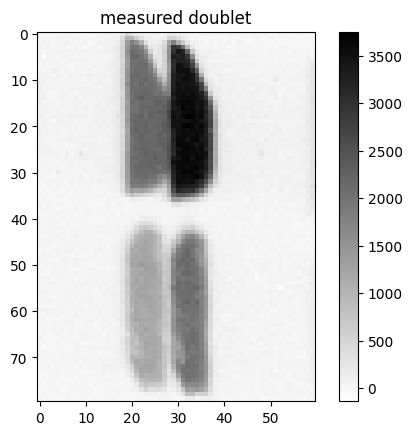

In [3]:
plt.figure()
plt.imshow(data, cmap="gray_r")
plt.colorbar()
plt.title("measured doublet")

In [4]:
xlam = np.array([22.752583897672594, 32.21099107386544]) # Длины волн из справочника, переведены в номера пикселей
dx = xlam - xlam[0]
dy = [0, 1.082] # Известное смещение по вертикали
dC = [1, 1.65] # Известное соотношение интенсивностей линий
offset = np.column_stack((dy, dx))

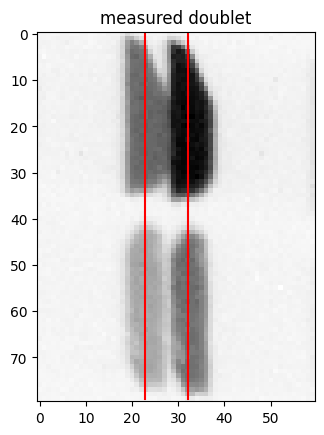

In [5]:
plt.figure()
plt.imshow(data, cmap="gray_r")
for x in xlam:
    plt.plot([x, x], [0, data.shape[0] - 1], 'r')
plt.title("measured doublet")
plt.show()

In [6]:
def make_source(shape, x):
    source = np.zeros(shape)
    ind = np.floor(x).astype(np.uint64)
    frac = x - ind
    one_frac = 1 - frac
    F = np.column_stack([one_frac, frac])
    s = np.outer(F[0], F[1])  
    source[ind[0]:ind[0]+2, ind[1]:ind[1]+2] = s
    return source

Text(0.5, 1.0, 'source')

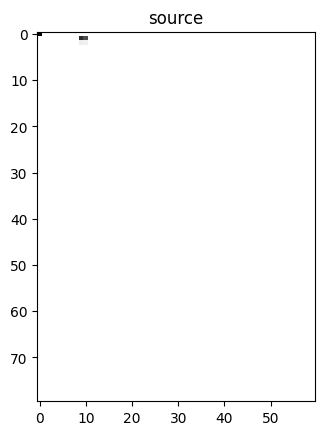

In [7]:
source = np.zeros_like(data)
for i, x in enumerate(offset):
    x = np.asarray(x)
    source += dC[i] * make_source(data.shape, x)
    
plt.imshow(source, cmap="gray_r")
plt.title("source")

$$ \sum_{ij} K_{i-n,j-m} \cdot x_{ij} = b_{nm} $$

In [8]:
A = np.zeros(data.shape + source.shape)
b = data.reshape(-1)

for c_idx in np.ndindex(data.shape):
    src = np.zeros_like(source)
    src[c_idx[0], c_idx[1]] = 1
    A[c_idx[0], c_idx[1], c_idx[0]:, c_idx[1]:] = source[:(data.shape[0] - c_idx[0]),:(data.shape[1] - c_idx[1])]
    
A = A.reshape(data.size, source.size).T

Измерений: $80 \times 60 = 4800$

Неизвестных: $80 \times 60 = 4800$

Матрица задачи: $4800 \times 4800$

In [9]:
x_ls, *_ = np.linalg.lstsq(A, b)

Text(0.5, 1.0, 'reconstructed')

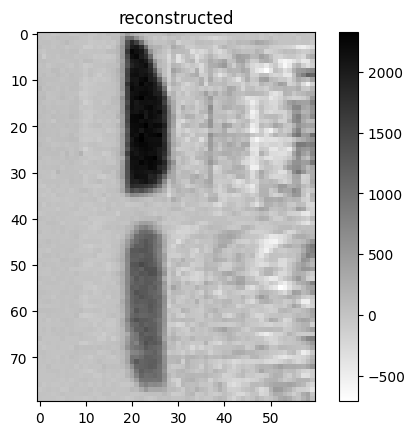

In [10]:
plt.imshow(x_ls.reshape(data.shape), cmap="gray_r")
plt.colorbar()
plt.title("reconstructed")

In [11]:
residual = A @ x_ls - b

Text(0.5, 1.0, 'residual')

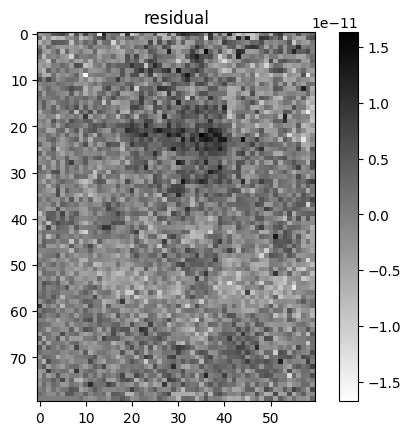

In [12]:
plt.imshow(residual.reshape(data.shape), cmap="gray_r")
plt.colorbar()
plt.title("residual")

In [13]:
x_ls_tsvd, *_ = np.linalg.lstsq(A, b, rcond=0.03)

Text(0.5, 1.0, 'reconstructed')

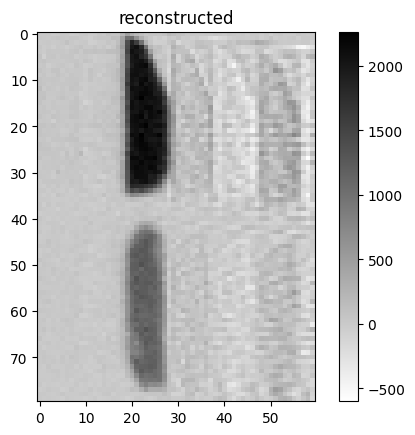

In [14]:
plt.imshow(x_ls_tsvd.reshape(data.shape), cmap="gray_r")
plt.colorbar()
plt.title("reconstructed")

In [15]:
residual = A @ x_ls_tsvd - b

Text(0.5, 1.0, 'residual')

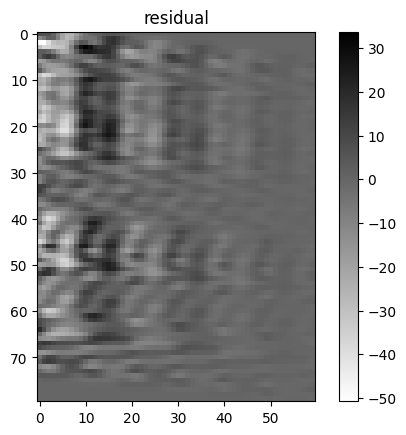

In [16]:
plt.imshow(residual.reshape(data.shape), cmap="gray_r")
plt.colorbar()
plt.title("residual")

In [17]:
x_nnls, *_ = nnls(A, b)

Text(0.5, 1.0, 'reconstructed')

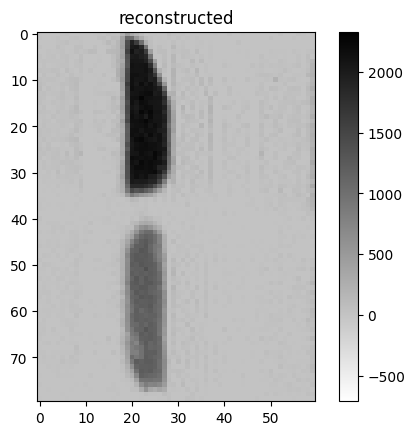

In [18]:
plt.imshow(x_nnls.reshape(data.shape), cmap="gray_r",
           vmax=np.max(x_ls), vmin=np.min(x_ls))
plt.colorbar()
plt.title("reconstructed")

In [19]:
residual = A @ x_nnls - b

Text(0.5, 1.0, 'residual')

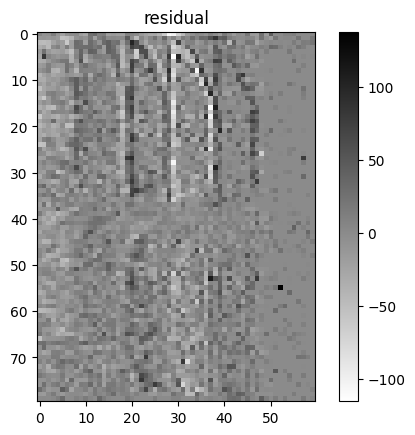

In [20]:
plt.imshow(residual.reshape(data.shape), cmap="gray_r")
plt.colorbar()
plt.title("residual")